In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [40]:
# Fit curve to eruption data
def fit_eruption(year, value, weights=None):
    if weights is None:
        weights = np.ones_like(value)

    # Translate eruption time to a small number greater than 0
    eps = 0.01
    t = year - year[0] + eps

    # Transform values to look like ~ 1/t
    data = value / value[-1]
    data = 1 / data
    data = data - 1

    # Find a least squares fit to the eruption curve using a 1/t function
    sol = least_squares(lambda x: weights * (x[0]/(t - x[1]) - data), [1, 0])

    # Transform to an "occluding" function that reduces incoming radiation
    # for time in seconds since the eruption
    def phi(t):
        # Function was fit in years.
        t = t / 365.25 / 24 / 3600
        return 1 / (sol.x[0]/(t - sol.x[1]) + 1)

    return phi

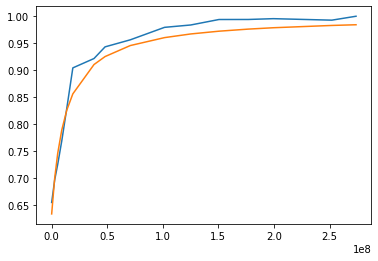

In [41]:
# Eruption 1 fit
df = pd.read_csv('./eruption_1.csv')
year = df['date'].values
value = df['value'].values
phi_1 = fit_eruption(year, value)
# Shift time to 0 and convert to seconds
t = (year - year[0]) * 365.25 * 24 * 3600
fig, ax = plt.subplots()
ax.plot(t, value / value[-1])
ax.plot(t, phi_1(t))

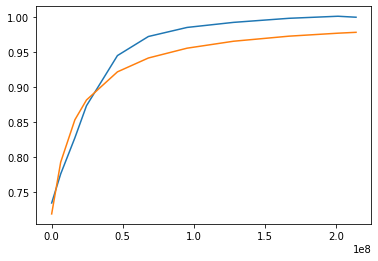

In [42]:
# Eruption 2 fit
df = pd.read_csv('./eruption_2.csv')
year = df['date'].values
value = df['value'].values
phi_2 = fit_eruption(year, value)

# Shift time to 0 and convert to seconds
t = (year - year[0]) * 365.25 * 24 * 3600
fig, ax = plt.subplots()
ax.plot(t, value / value[-1])
ax.plot(t, phi_2(t))

In [43]:
# Take phi as the average of the two fits
phi = lambda t: 0.5 * (phi_1(t)  + phi_2(t))

Text(0, 0.5, '$\\phi(t)$')

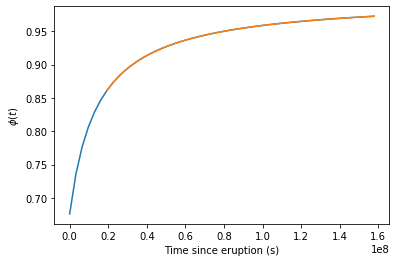

In [44]:
# Plot final function
fig, ax = plt.subplots()
years = 5
t = np.linspace(0, years * 365.25 * 24 * 3600)
ax.plot(t, phi(t))
ax.plot(t[6:],phi(t)[6:])
ax.set_xlabel('Time since eruption (s)')
ax.set_ylabel('$\phi(t)$')

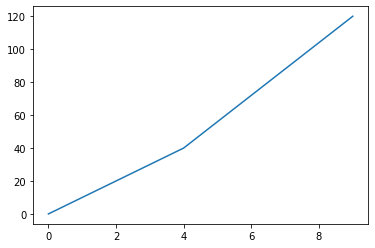

In [45]:
x = [0,40,120]
t = [0,4,9]

plt.plot(t,x)

In [46]:
df = pd.read_csv('E3WebApp_Eruptions1960.csv')
df = df[df.StartDateYear > 1959]
dates = df['StartDate'].values

#Drop duplicates
df2 = df.drop_duplicates(subset=['VolcanoNumber'])
lat = df2['LatitudeDecimal'].values

#Count latitude occurrences
value_counts = df['LatitudeDecimal'].value_counts(dropna=True, sort=True)
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['Latitude', 'Counts']

#Find number of volcanoes per zone
def Zones(df_value_counts):
    zone1 = []
    zone2 = []
    zone3 = []
    zone4 = []
    zone5 = []
    zone6 = []
    zone1_erc = []
    zone2_erc = []
    zone3_erc = []
    zone4_erc = []
    zone5_erc = []
    zone6_erc = []
    for i in range(len(df_value_counts)):
        if df_value_counts.iloc[i][0] > 60:
            zone6.append(df_value_counts.iloc[i][0])
            zone6_erc.append(df_value_counts.iloc[i][1])
        if df_value_counts.iloc[i][0] > 30 and df_value_counts.iloc[i][0] < 60:
            zone5.append(df_value_counts.iloc[i][0])
            zone5_erc.append(df_value_counts.iloc[i][1])
        if df_value_counts.iloc[i][0] > 0 and df_value_counts.iloc[i][0] <30:
            zone4.append(df_value_counts.iloc[i][0])
            zone4_erc.append(df_value_counts.iloc[i][1])
        if df_value_counts.iloc[i][0] <0 and df_value_counts.iloc[i][0] >-30:
            zone3.append(df_value_counts.iloc[i][0])
            zone3_erc.append(df_value_counts.iloc[i][1])
        if df_value_counts.iloc[i][0] <-30 and df_value_counts.iloc[i][0]>-60:
            zone2.append(df_value_counts.iloc[i][0])
            zone2_erc.append(df_value_counts.iloc[i][1])
        if df_value_counts.iloc[i][0] <-60 and df_value_counts.iloc[i][0]>-90:
            zone1.append(df_value_counts.iloc[i][0])
            zone1_erc.append(df_value_counts.iloc[i][1])
    volc_num = [len(zone1),len(zone2),len(zone3),len(zone4),len(zone5),len(zone6)]
    return (volc_num,zone1,zone2,zone3,zone4,zone5,zone6,zone1_erc,zone2_erc,zone3_erc,zone4_erc,zone5_erc,zone6_erc)

Zones = Zones(df_value_counts)

#Number of volcanoes per zone
volc = Zones[0]

#Volcano latitudes
Zone1 = Zones[1]
Zone2 = Zones[2]
Zone3 = Zones[3]
Zone4 = Zones[4]
Zone5 = Zones[5]
Zone6 = Zones[6]

#Number of eruptions per zone since 1960
Zone1e = np.sum(Zones[7])
Zone2e = np.sum(Zones[8])
Zone3e = np.sum(Zones[9])
Zone4e = np.sum(Zones[10])
Zone5e = np.sum(Zones[11])
Zone6e = np.sum(Zones[12])

In [47]:
# Find average repose time per zone (mind we're neglecting the eruption length)
t_tot = (45 + 5/12 + 5/365.25)*365.25*24*3600
t_tot_yr = (45 + 5/12 + 5/365.25)

# Zonal average repose time (in yrs)
Zone_av_yr = []
for i in range(7,13):
    Zone_av_yr.append(np.sum(Zones[i])/t_tot_yr)

# Zonal average repose time (in s)
Zone_av_s = []
for i in range(7,13):
    Zone_av_s.append(np.sum(Zones[i])/t_tot)


In [49]:
Zones[0]

[2, 36, 103, 90, 86, 12]